In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib as mpl
import pickle

import readdy_learn.example.predator_prey as pp

In [2]:
X = 1000.
Y = 1000.

BETA = 200.

pp.TIMESTEP = 2e-7
pp.RATES = np.array([
    10.,  # X + X -> 0
    10.,  # Y + Y -> 0
    X * BETA,  # X -> X + X
    BETA,  # X + Y -> Y + Y
    Y * BETA,  # Y -> 0
])
pp.INITIAL_STATES = np.array([
    [1500, 1500],
])

In [55]:
time, count, dcount_dt = pp.generate_lma(0, .0001)

In [22]:
time, count, dcount_dt = pp.generate_kmc(0, .0001, n_realizations=3, njobs=6)

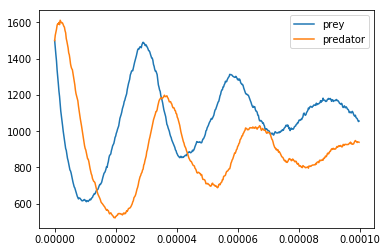

In [23]:
plt.plot(time, count[:, 0], label='prey')
plt.plot(time, count[:, 1], label='predator')
plt.legend()
plt.show()

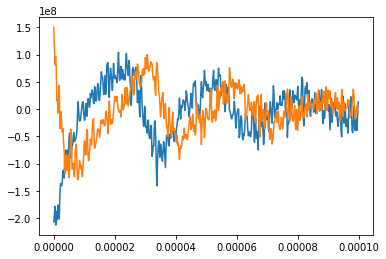

In [24]:
plt.plot(time,  dcount_dt)

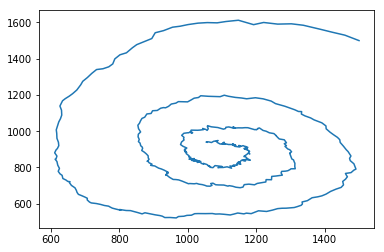

In [25]:
plt.plot(count[:, 0], count[:, 1])

In [26]:
X = pp.solve(count, dcount_dt, 0., 1.)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
11 / 30000 iterations


In [27]:
(X - pp.RATES) / pp.RATES

array([ 0.26985021, -0.14489205,  0.01882257,  0.00238321,  0.01180903])